задание - реализовать модельку, которая бы определяла на картинке - есть на ней герб или нет. Под гербом понимается любой схематичный рисунок/изображение, размещаемый на гербах (можно на конкретный герб натренировать, можно просто пробовать определить есть ли "какой-то" герб на картинке или его bounding box,).
Если герб найден - обводим его рамкой и возвращаем пользователю. Обучающий датасет - картинок 100-150 скорее всего будет достаточно для базовых результатов.
Разрешение входных изображений от пользователя м.б. производьным - фотки (в том числе с большим разрешением)/скрины/картинки из инета/....
Для демонстрации работы модели (нам ни моделька ни обучающий датасет не интересны) - обернуть в простой веб сервис с одной страничкой, на которой пользователь может загрузить одну или несколько картинок, а в ответ получит картинки, где был найден герб с выделением области(ей) найденных гербов.
Для демонстрации работы веб-сервис можно вывесить через ngrok или как сервис onion. В качестве решения - просьба отправить ссылку на сервис и примеры картинок, на которых успешно находится символика и минимальные размеры герба на изображении, при которых модель успешно будет их детектить  + пояснение какую модель выбрали и почему

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 97.3MB/s]


The new directory is created!


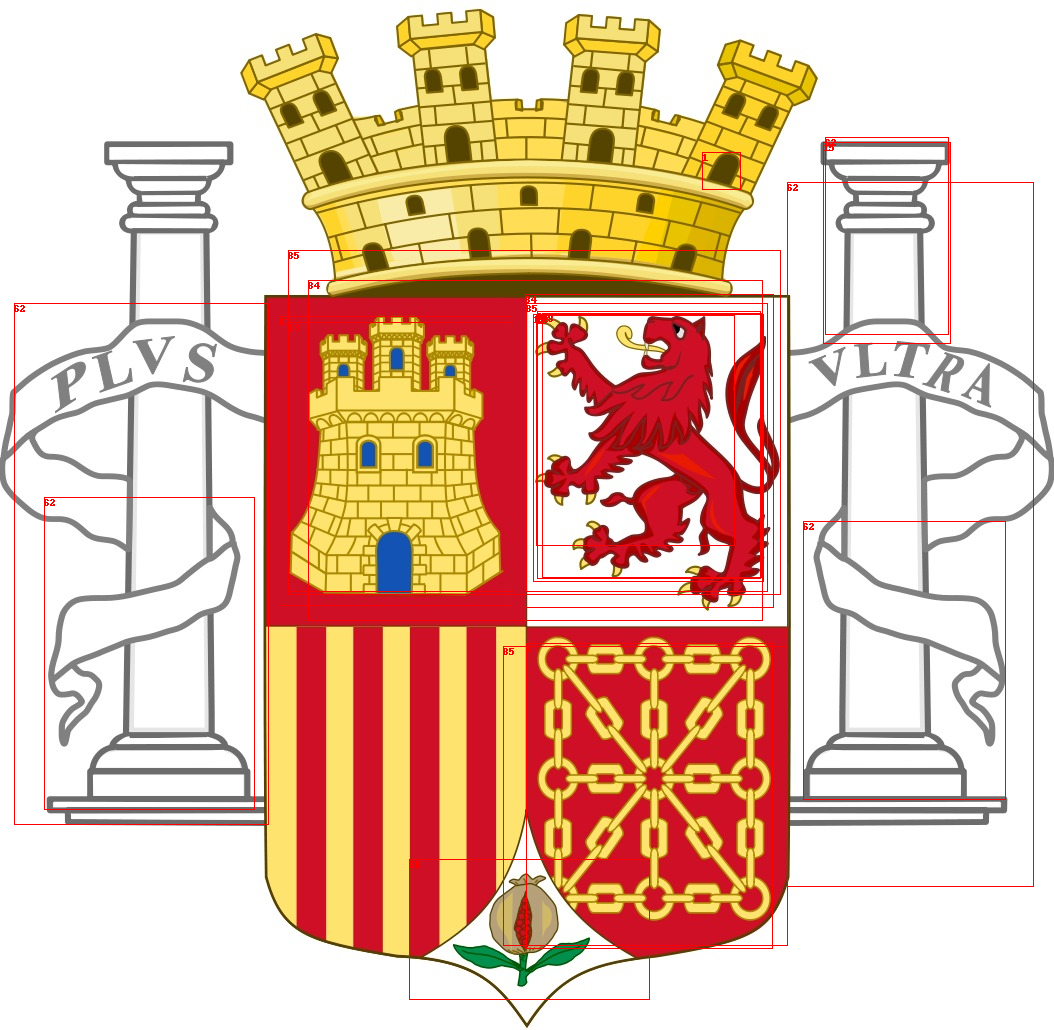

In [1]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw
from IPython.display import Image as sh_im
from matplotlib import pyplot
import os


# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image and transform it to the required format
image_path = "/kaggle/input/coat-of-arms/folder/1407537.jpg"  # Replace with the actual path to your coat of arms image
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image)
# Make predictions
with torch.no_grad():
    predictions = model([image_tensor])

# Extract the bounding box coordinates and class labels
boxes = predictions[0]["boxes"].tolist()
labels = predictions[0]["labels"].tolist()

# Draw bounding boxes around the symbols
draw = ImageDraw.Draw(image)
for box, label in zip(boxes, labels):
    draw.rectangle(box, outline="red")
    draw.text((box[0], box[1]), str(label), fill="red")

# Save the modified image
path = "./version_1/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
output_image_path = "./version_1/v1.png"  
image.save(output_image_path)
Image.open(output_image_path) # Uncomment to see images

In [2]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image and transform it to the required format
image_path = "/kaggle/input/coat-of-arms/folder/0-1466_coat-of-arms-family-crest-ghana-coat-of.png"  # Replace with the actual path to your image
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image)

# Make predictions
with torch.no_grad():
    predictions = model([image_tensor])

# Check if it is a coat of arms
labels = predictions[0]["labels"].tolist()
if 1 in labels:  # Assuming class label 1 represents the coat of arms
    # Extract the bounding box coordinates and class labels
    boxes = predictions[0]["boxes"].tolist()
    labels = predictions[0]["labels"].tolist()

    # Draw bounding boxes around the symbols or objects
    draw = ImageDraw.Draw(image)
    for box, label in zip(boxes, labels):
        draw.rectangle(box, outline="red")
        draw.text((box[0], box[1]), str(label), fill="red")

    # Save the modified image
    path = "./version_2"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        print("The new directory is created!")
    output_image_path = "./version_2/v2.png"  # Replace with the desired path and filename
    image.save(output_image_path)
    display(Image.open(output_image_path))

else:
    print("This is not a coat of arms.")

This is not a coat of arms.


The new directory is created!


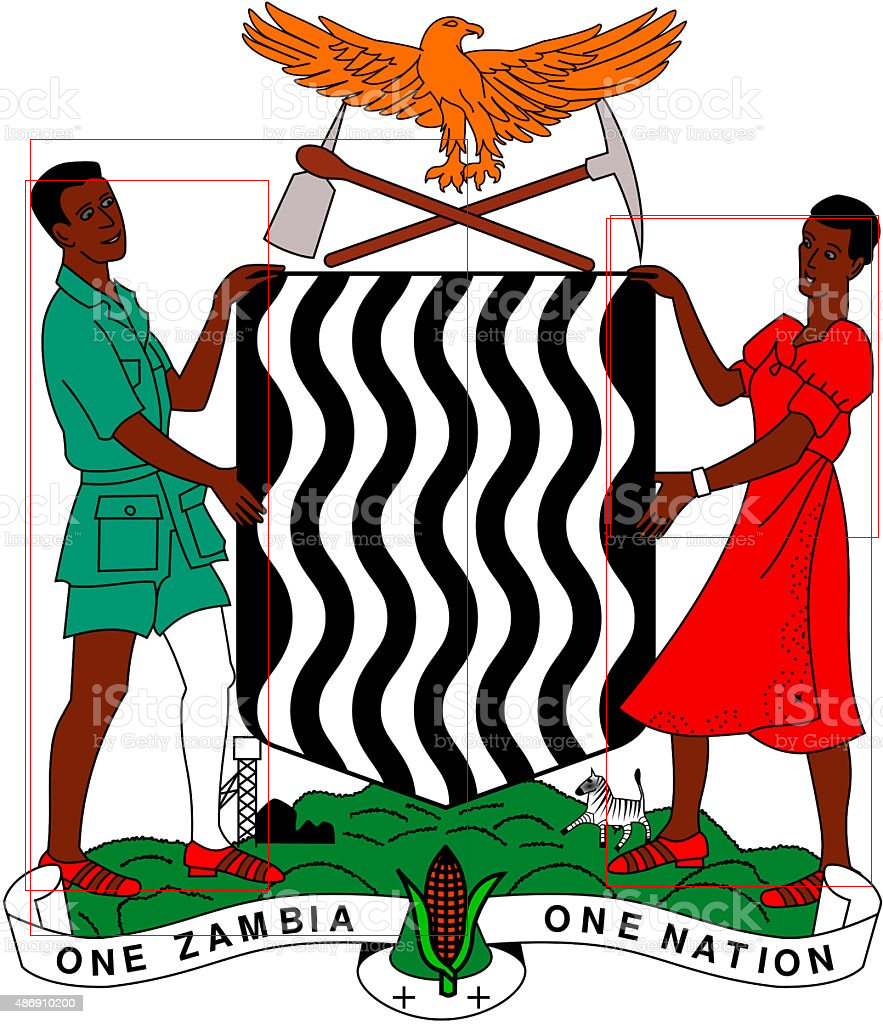

In [3]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image and transform it to the required format
image_path = "/kaggle/input/coat-of-arms/folder/istockphoto-486910200-1024x1024.jpg"  # Replace with the actual path to your image
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image)

# Make predictions
with torch.no_grad():
    predictions = model([image_tensor])

# Check if it is a coat of arms
labels = predictions[0]["labels"].tolist()
if 1 in labels:  # Assuming class label 1 represents the coat of arms
    # Extract the bounding box coordinates for the coat of arms
    coat_of_arms_indices = [i for i, label in enumerate(labels) if label == 1]
    boxes = [predictions[0]["boxes"][i].tolist() for i in coat_of_arms_indices]

    # Draw bounding box around the coat of arms
    draw = ImageDraw.Draw(image)
    for box in boxes:
        draw.rectangle(box, outline="red")

    path = "./version_3"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        print("The new directory is created!")
    # Save the modified image
    output_image_path = "./version_3/v3.png"  # Replace with the desired path and filename
    image.save(output_image_path)
    display(Image.open(output_image_path))

else:
    print("This is not a coat of arms.")

In [4]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image, ImageDraw

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image and transform it to the required format
image_path = "/kaggle/input/coat-of-arms/folder/istockphoto-486910200-1024x1024.jpg"  # Replace with the actual path to your image
image = Image.open(image_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image)

# Make predictions
with torch.no_grad():
    predictions = model([image_tensor])

# Extract the bounding boxes, labels, and scores
boxes = predictions[0]["boxes"].tolist()
labels = predictions[0]["labels"].tolist()
scores = predictions[0]["scores"].tolist()

# Find the index with the highest score for the coat of arms
coat_of_arms_index = -1
max_score = 0
for i, label in enumerate(labels):
    if label == 1:  # Assuming class label 1 represents the coat of arms
        if scores[i] > max_score:
            coat_of_arms_index = i
            max_score = scores[i]

# Draw bounding box around the coat of arms
if coat_of_arms_index != -1:
    coat_of_arms_box = boxes[coat_of_arms_index]
    draw = ImageDraw.Draw(image)
    draw.rectangle(coat_of_arms_box, outline="red")

    path = "./version_4"
    # Check whether the specified path exists or not
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(path)
        print("The new directory is created!")
    # Save the modified image
    output_image_path = "./version_4/v4.png"
    image.save(output_image_path)
    #display(Image.open(output_image_path)) # Uncomment to see pics

else:
    print("This is not a coat of arms.")

The new directory is created!
